Primeiramente vamos importar as bibliotecas e visualizar os dados do experimento:

In [1]:
import numpy as np
from pandas import read_csv
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

#Ler o arquivo csv
data = read_csv("RSSI.csv")

data

,d,RSSI
0,1.0,-44
1,1.0,-42
2,1.0,-45
3,2.0,-44
4,2.0,-42
5,2.0,-51
6,3.0,-49
7,3.0,-45
8,3.2,-55
9,4.0,-58


Plotar as potências RSSI em função das distâncias

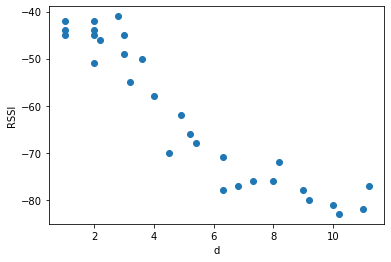

In [2]:
x = data["d"]

y = data["RSSI"]

plt.scatter(x, y)

plt.xlabel("d")
plt.ylabel("RSSI")

plt.show()

Plotar agora as potências em função do logaritmo da distância

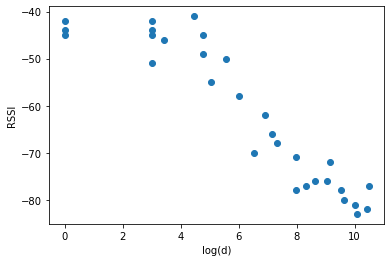

In [3]:
x = 10*np.log10(x)

plt.scatter(x, y)

plt.xlabel("log(d)")
plt.ylabel("RSSI")

plt.show()

Truncando os 3 primeiros valores

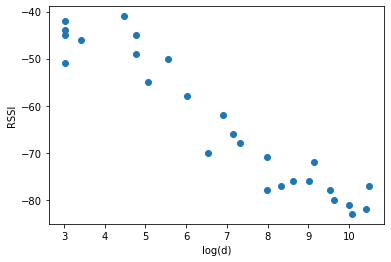

In [4]:
x = x[3:]
y = y[3:]

plt.scatter(x, y)

plt.xlabel("log(d)")
plt.ylabel("RSSI")

plt.show()

Encontrar uma linha que se adapta aos dados com seu desvio padrão

y = -5.45243 * x + -26.39110
sigma = 4.39560


<function matplotlib.pyplot.show(*args, **kw)>

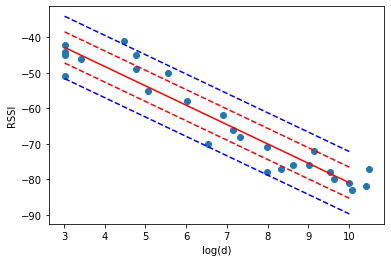

In [5]:
# Definir a função para a interpolação
def lineEq(x, a, b):
    return a * x + b

# Função para calcular o desvio padrão
def getStd(x, y, a, b):
    sumErr = 0
    for x_val, y_val in zip(x, y):
        error = y_val - lineEq(x_val, a, b)
        sumErr += error*error
    return np.sqrt(sumErr/len(x))

# Aplicar o MMQ
params, covar = curve_fit(lineEq, x, y)

# Mostrar os parâmetros obtidos
a, b = params
std = getStd(x,y,a,b)
print('y = %.5f * x + %.5f' % (a, b))
print('sigma = %.5f' % std)

# Plot dos pontos experimentais
plt.scatter(x, y)

# Plot da linha obtida
x_line = np.arange(min(x), max(x), 1)
y_line = lineEq(x_line, a, b)
plt.plot(x_line, y_line, '-', color='red')


# Plotar plot das linhas de desvio padrão
# 68%
y_line_plus = y_line + std
plt.plot(x_line, y_line_plus, '--', color='red')

y_line_minus = y_line - std
plt.plot(x_line, y_line_minus, '--', color='red')

# 95%
y_line_plus = y_line + 2*std
plt.plot(x_line, y_line_plus, '--', color='blue')

y_line_minus = y_line - 2*std
plt.plot(x_line, y_line_minus, '--', color='blue')

plt.xlabel("log(d)")
plt.ylabel("RSSI")

plt.show